<a href="https://colab.research.google.com/github/plaban1981/Air-Quality-Index-Prediction/blob/master/Air_quality_index_prediction_XGBoostregressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import Input Data

In [2]:
data = pd.read_csv('/content/Real_Combine.csv')
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,22.3,30.2,16.3,1012.6,79.0,1.6,6.7,11.1,284.795833
1,24.1,31.4,18.0,1012.5,81.0,1.9,10.9,20.6,219.720833
2,25.3,31.7,21.0,1012.7,82.0,1.6,6.7,9.4,182.187500
3,23.5,30.0,18.5,1013.2,78.0,1.3,8.7,13.0,154.037500
4,20.4,26.3,16.4,1015.0,72.0,1.0,8.3,11.1,223.208333


## Summary of Data

In [3]:
data.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,548.000000
mean,27.288707,33.381239,22.703461,1007.860474,76.602914,2.702914,9.582878,17.048270,105.224977
std,3.564886,4.076315,4.157862,6.073538,11.598628,0.760996,5.633784,8.175628,80.302249
min,18.500000,21.600000,11.800000,993.200000,48.000000,0.800000,1.500000,5.400000,0.000000
25%,25.000000,30.300000,19.900000,1002.600000,68.000000,1.900000,5.700000,11.100000,44.083333
50%,27.900000,32.900000,24.100000,1008.400000,76.000000,2.600000,8.000000,14.800000,80.041667
75%,29.700000,36.200000,25.900000,1013.200000,86.000000,3.200000,12.200000,22.200000,148.270833
max,36.100000,45.400000,30.000000,1020.100000,100.000000,4.500000,38.500000,68.300000,404.500000


##Check Null Values if any

In [5]:
data.isnull().sum()[data.isnull().sum() > 0]

PM 2.5    1
dtype: int64

####The output label PM2.5 has 2 null values.

##Drop Null Values

In [0]:
data = data.dropna()

## Separate Indepenedent Features and Dependent Features

In [0]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [8]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,22.3,30.2,16.3,1012.6,79.0,1.6,6.7,11.1
1,24.1,31.4,18.0,1012.5,81.0,1.9,10.9,20.6
2,25.3,31.7,21.0,1012.7,82.0,1.6,6.7,9.4
3,23.5,30.0,18.5,1013.2,78.0,1.3,8.7,13.0
4,20.4,26.3,16.4,1015.0,72.0,1.0,8.3,11.1


In [9]:
Y.head()

0    284.795833
1    219.720833
2    182.187500
3    154.037500
4    223.208333
Name: PM 2.5, dtype: float64

##Correlation Between Features

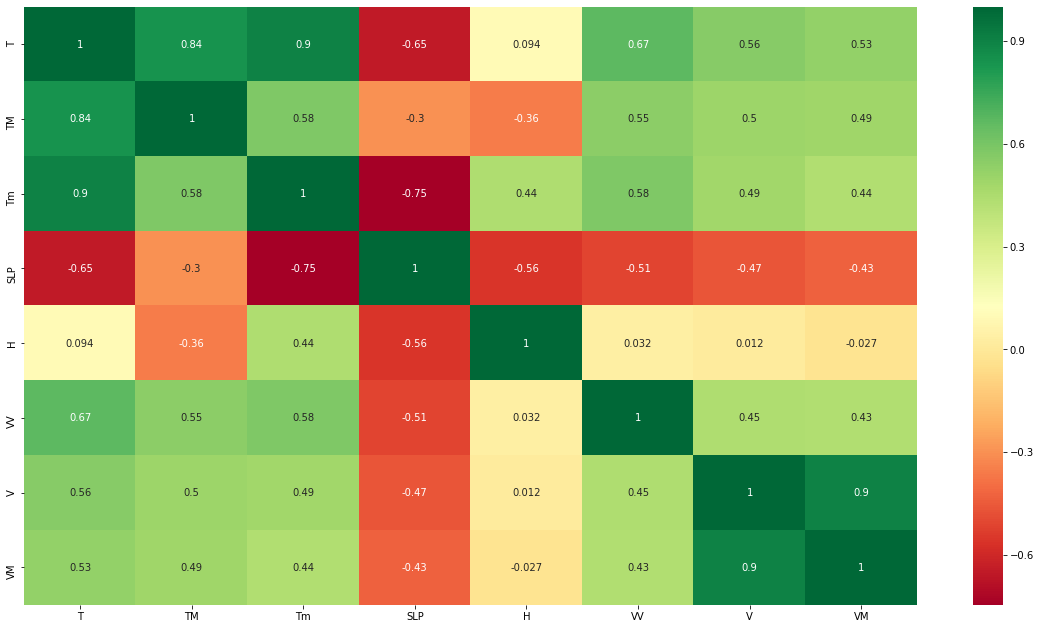

In [15]:
plt.figure(figsize=(20,11))
corr_mat = X.corr()
sns.heatmap(corr_mat,annot=True,cmap="RdYlGn")

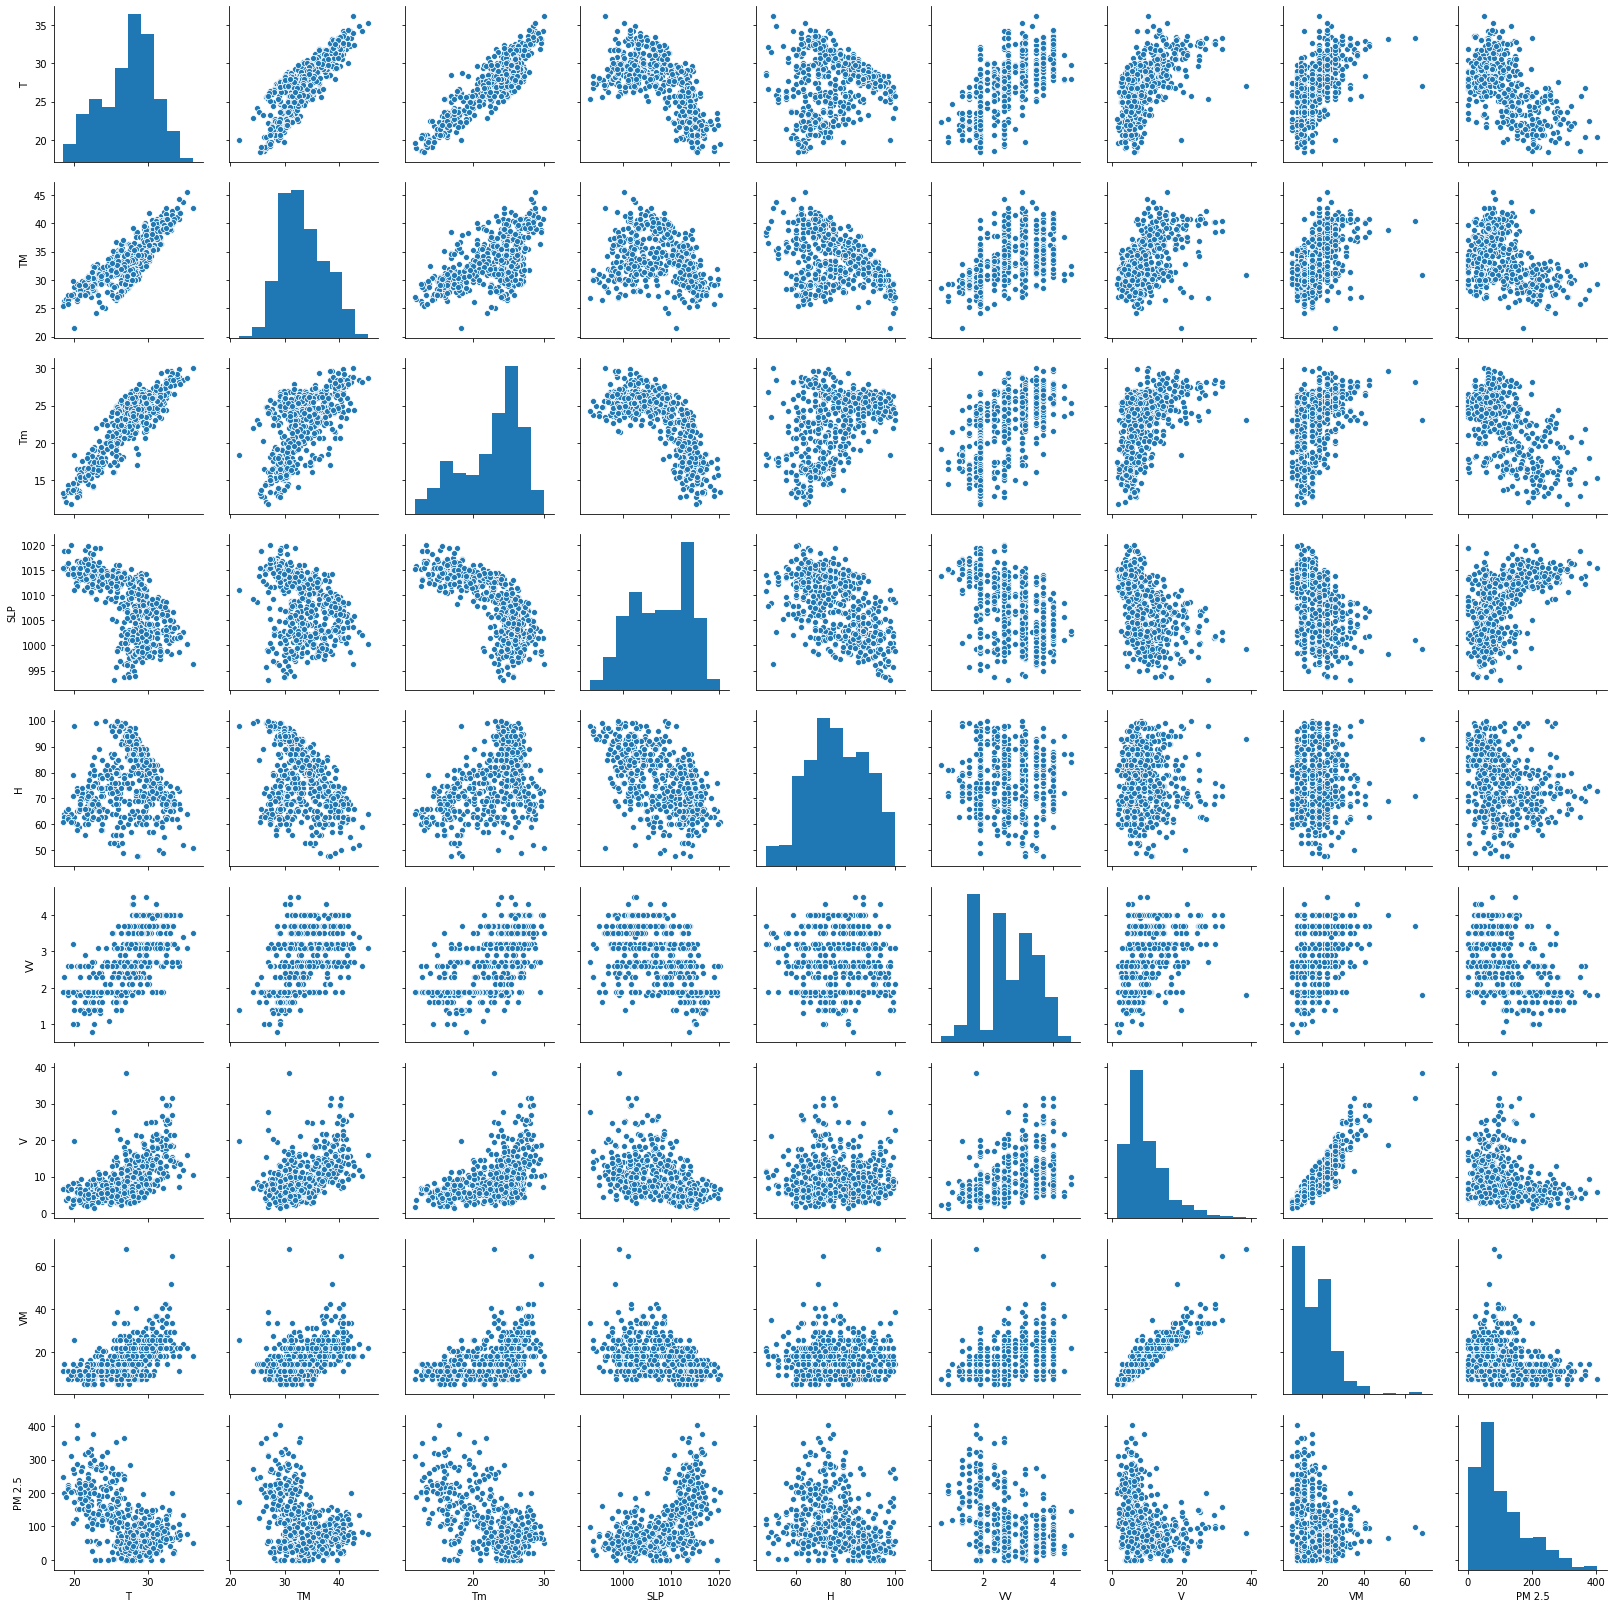

In [16]:
sns.pairplot(data)

##Split data into training and test dataset

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

##Visualize Label

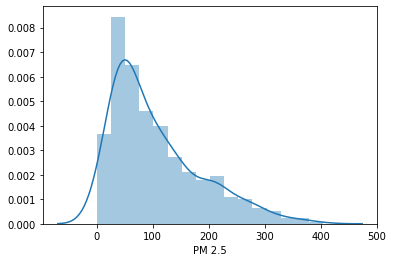

In [17]:
sns.distplot(Y)

## XgboostRegressor

In [0]:
import xgboost as xgb

In [19]:
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)

[14:04:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [20]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.8413144645607531


In [21]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.578731577187088


In [23]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,Y,cv=5)

[14:06:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [24]:
score.mean()

0.20853032998108417

## Model Evaluation

In [0]:
y_pred = regressor.predict(X_test)

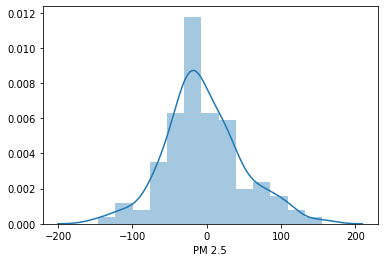

In [26]:
sns.distplot(y_test - y_pred)

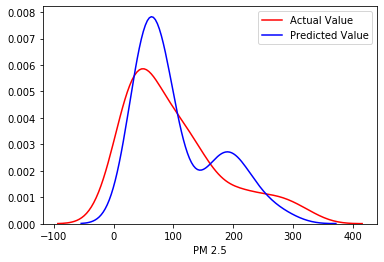

In [27]:
ax1 = sns.distplot(y_test,hist=False,color='r',label ='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value')

##HyperParameter tuning


In [0]:
from sklearn.model_selection import RandomizedSearchCVxgb

In [31]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 10)]
print(n_estimators)

[100, 222, 344, 466, 588, 711, 833, 955, 1077, 1200]


## Parameter ranges

In [0]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [34]:
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


### Random search of parameters, using 5 fold cross validation, search across 100 different combinations

In [0]:
regressor = xgb.XGBRegressor()

In [0]:
xgb_random = RandomizedSearchCV(estimator=regressor,param_distributions= random_grid,scoring='neg_mean_squared_error',n_iter=100,cv=5,random_state=1,verbose=2,n_jobs=-1)

In [37]:
xgb_random.fit(X,Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstan

[14:32:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                             

In [38]:
xgb_random.best_params_

{'learning_rate': '0.05',
 'max_depth': 10,
 'min_child_weight': 4,
 'n_estimators': 200,
 'subsample': 0.7}

In [39]:
xgb_random.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate='0.05', max_delta_step=0,
             max_depth=10, min_child_weight=4, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [40]:
xgb_random.best_score_

-3936.0597594700266

## Applying the best parameters for XGBoostRegressor an training the model

In [0]:
xgb_model = xgb_random.best_estimator_

In [42]:
xgb_model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:44:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate='0.05', max_delta_step=0,
             max_depth=10, min_child_weight=4, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [0]:
y_pred = xgb_model.predict(X_test)

##Visualize Predictions

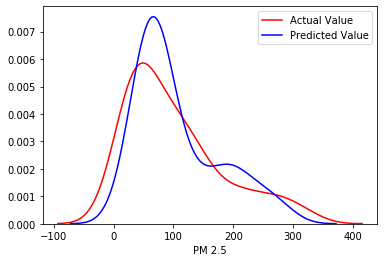

In [44]:
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value')

## Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

- **Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
- **Mean Squared Error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
- **Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
-RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [45]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error : {mean_squared_error(y_test,y_pred)}')
print(f'Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test,y_pred))}')
print(f'R squared error : {r2_score(y_test,y_pred)}')

Mean Absolute Error : 41.672348610849085
Mean Squared Error : 3189.501577448336
Root Mean Squared Error : 56.475672439098375
R squared error : 0.5083156059139285


##Save Model

In [0]:
import pickle
file = open('xgboostregressor.pkl','wb')
pickle.dump(xgb_model,file)
file.close()